The estimation of Feature Importance based on a Linear Regression model.

Analyzing the most important features in the input dataframe with respect to a simple linear regression model. 
For this reason, first all the highly correlated features were dropped according to result of VIF and 
then regression model was applied to estimate the importance of each remaining features.


In [ ]:
%load_ext jupyter_black

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from utils import get_clean_dataset

In [ ]:
df = get_clean_dataset()

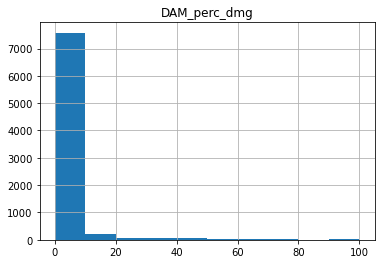

In [1]:
# Show histogram of damage
combined_input_data.hist(column="DAM_perc_dmg") 

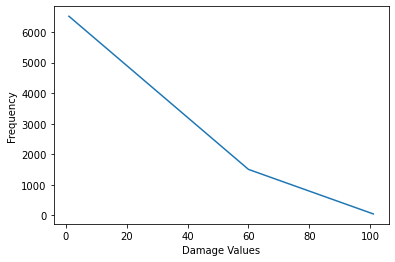

In [2]:
#A bin's set defined to categorize target values in different groups(bins)
#The chosen bins
bins2= [0, 1, 60, 101]
samples_per_bin2, binsP2 = np.histogram(df['DAM_perc_dmg'], bins=bins2)
plt.xlabel("Damage Values")
plt.ylabel("Frequency")
plt.plot(binsP2[1:],samples_per_bin2)

In [3]:
#Display bins
print(samples_per_bin2)
print(binsP2)

[6517 1506   50]
[  0   1  60 101]


In [4]:
bin_index2=np.digitize(df['DAM_perc_dmg'], bins=binsP2)

In [5]:
y_input_strat=bin_index2

In [6]:
#List of features after highly correlated ones based on VIF.
features =['HAZ_rainfall_Total', 
        'HAZ_v_max',
        'GEN_landslide_per',
        'GEN_stormsurge_per', 
        'GEN_Red_per_LSbldg',
        'GEN_Or_per_LSblg',  
        'GEN_OR_per_SSAbldg',
        'GEN_Yellow_per_LSbl',
        'TOP_mean_slope',
        'GEN_with_coast',
        'GEN_coast_length', 
        'VUL_Housing_Units',
        'VUL_StrongRoof_StrongWall', 
        'VUL_StrongRoof_SalvageWall', 
        'VUL_LightRoof_StrongWall',
        'VUL_LightRoof_LightWall', 
        'VUL_LightRoof_SalvageWall',
        'VUL_SalvagedRoof_StrongWall',
        'VUL_SalvagedRoof_LightWall',
        'VUL_SalvagedRoof_SalvageWall']

# Split X and y from dataframe features
X = df[features]
display(X.columns)
y = df["DAM_perc_dmg"]

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)


# Split dataset into training set and test set and applying data stratification according to the defined bins
X_train, X_test, y_train, y_test = train_test_split(X_scaled,df['DAM_perc_dmg'], stratify=y_input_strat, test_size=0.2)


Index(['HAZ_rainfall_Total', 'HAZ_v_max', 'GEN_landslide_per',
       'GEN_stormsurge_per', 'GEN_Red_per_LSbldg', 'GEN_Or_per_LSblg',
       'GEN_OR_per_SSAbldg', 'GEN_Yellow_per_LSbl', 'TOP_mean_slope',
       'GEN_with_coast', 'GEN_coast_length', 'VUL_Housing_Units',
       'VUL_StrongRoof_StrongWall', 'VUL_StrongRoof_SalvageWall',
       'VUL_LightRoof_StrongWall', 'VUL_LightRoof_LightWall',
       'VUL_LightRoof_SalvageWall', 'VUL_SalvagedRoof_StrongWall',
       'VUL_SalvagedRoof_LightWall', 'VUL_SalvagedRoof_SalvageWall'],
      dtype='object')

In [7]:
regressor = LinearRegression()
model_regr=regressor.fit(X_train, y_train)

In [8]:
feature=[]
values=[]
importance = regressor.coef_
#print(importance)
for i,j in enumerate(importance):
    print('Feature %0d ' %(i) + X.columns[i]+':, Score: %.5f' % (j))
    
    feature.append(X.columns[i])
    values.append(j)
        

Feature 0 HAZ_rainfall_Total:, Score: -0.61692
Feature 1 HAZ_v_max:, Score: 4.61958
Feature 2 GEN_landslide_per:, Score: -0.33466
Feature 3 GEN_stormsurge_per:, Score: 0.49409
Feature 4 GEN_Red_per_LSbldg:, Score: 0.31249
Feature 5 GEN_Or_per_LSblg:, Score: -0.10517
Feature 6 GEN_OR_per_SSAbldg:, Score: -0.18486
Feature 7 GEN_Yellow_per_LSbl:, Score: -0.01378
Feature 8 TOP_mean_slope:, Score: -0.50279
Feature 9 GEN_with_coast:, Score: 0.19560
Feature 10 GEN_coast_length:, Score: -0.33379
Feature 11 VUL_Housing_Units:, Score: -0.16091
Feature 12 VUL_StrongRoof_StrongWall:, Score: -0.77510
Feature 13 VUL_StrongRoof_SalvageWall:, Score: 0.91703
Feature 14 VUL_LightRoof_StrongWall:, Score: 0.36244
Feature 15 VUL_LightRoof_LightWall:, Score: -0.09972
Feature 16 VUL_LightRoof_SalvageWall:, Score: 0.18437
Feature 17 VUL_SalvagedRoof_StrongWall:, Score: -0.04784
Feature 18 VUL_SalvagedRoof_LightWall:, Score: 0.15816
Feature 19 VUL_SalvagedRoof_SalvageWall:, Score: -0.04178


In [9]:
#Creating a dataframe of features and their coefficient values 

df_coef=pd.DataFrame(columns = ['feature', 'coef_value'])
df_coef['feature']= feature
df_coef['coef_value']= values

df_coef

,feature,coef_value
0,HAZ_rainfall_Total,-0.616918
1,HAZ_v_max,4.619585
2,GEN_landslide_per,-0.334660
3,GEN_stormsurge_per,0.494085
4,GEN_Red_per_LSbldg,0.312489
5,GEN_Or_per_LSblg,-0.105170
6,GEN_OR_per_SSAbldg,-0.184863
7,GEN_Yellow_per_LSbl,-0.013783
8,TOP_mean_slope,-0.502794
9,GEN_with_coast,0.195599


In [10]:
#Sorting the dataframe of coefficient values in a descending order

final_sorted_df = df_coef.sort_values(by=['coef_value'], ascending=False)
final_sorted_df=final_sorted_df.reset_index(drop=True)
final_sorted_df

,feature,coef_value
0,HAZ_v_max,4.619585
1,VUL_StrongRoof_SalvageWall,0.917031
2,GEN_stormsurge_per,0.494085
3,VUL_LightRoof_StrongWall,0.362441
4,GEN_Red_per_LSbldg,0.312489
5,GEN_with_coast,0.195599
6,VUL_LightRoof_SalvageWall,0.184371
7,VUL_SalvagedRoof_LightWall,0.158162
8,GEN_Yellow_per_LSbl,-0.013783
9,VUL_SalvagedRoof_SalvageWall,-0.041776


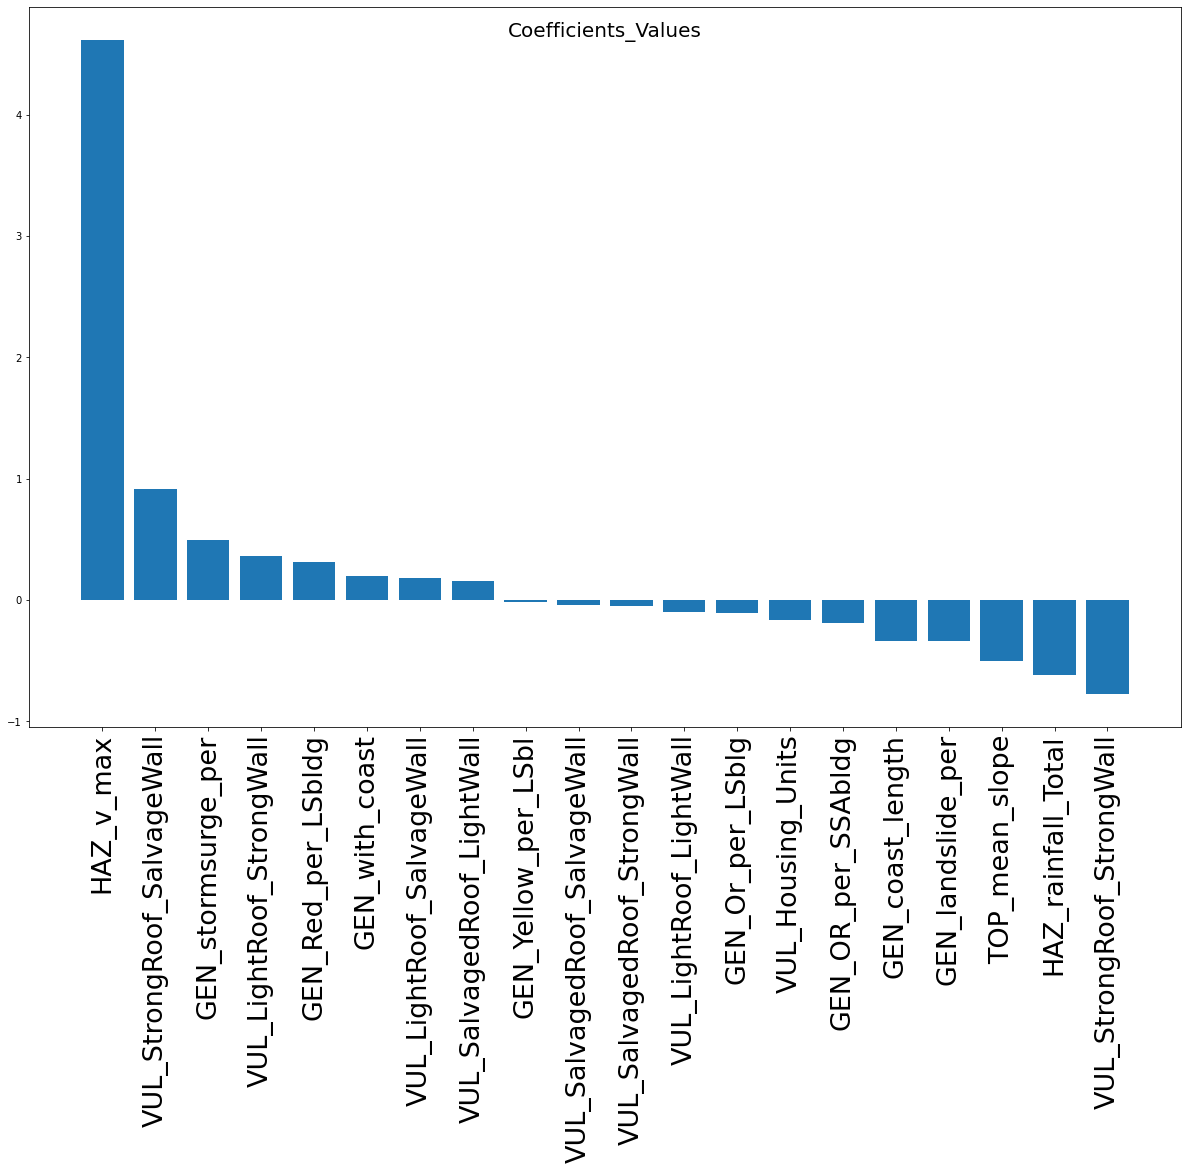

In [11]:
fig = plt.figure(figsize=(16,10))
fig.suptitle("Coefficients_Values", fontsize=20)
ax = fig.add_axes([0,0,1,1])
#ax.bar(features,values)
ax.bar(final_sorted_df['feature'],final_sorted_df['coef_value'])
np.rot90(plt.xticks(rotation=90, fontsize=27))
plt.show()

In [12]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     116.6
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:45:14   Log-Likelihood:                -22584.
No. Observations:                6458   AIC:                         4.521e+04
Df Residuals:                    6437   BIC:                         4.535e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4918      0.100     25.018      0.0

In [13]:
fea = X.columns
fea.tolist()
fea_1=pd.DataFrame(columns=['names'])
fea_1['names']=fea.tolist()
fea_1

,names
0,HAZ_rainfall_Total
1,HAZ_v_max
2,GEN_landslide_per
3,GEN_stormsurge_per
4,GEN_Red_per_LSbldg
5,GEN_Or_per_LSblg
6,GEN_OR_per_SSAbldg
7,GEN_Yellow_per_LSbl
8,TOP_mean_slope
9,GEN_with_coast
